# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:

file_path = "/content/imdb_reviews_cleaned.csv"


with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

data = [line.strip().split(',')[-1] for line in lines[1:101] if line.strip()]


def generate_ngrams(text, n):
    words = text.split()
    return [tuple(words[i:i+n]) for i in range(len(words) - n + 1)]


bigram_counts = {}
trigram_counts = {}
unigram_counts = {}

for review in data:
    words = review.split()
    for word in words:
        unigram_counts[word] = unigram_counts.get(word, 0) + 1

    for bigram in generate_ngrams(review, 2):
        bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1

    for trigram in generate_ngrams(review, 3):
        trigram_counts[trigram] = trigram_counts.get(trigram, 0) + 1


bigram_probabilities = {}
for (w1, w2), count in bigram_counts.items():
    bigram_probabilities[(w2, w1)] = count / unigram_counts[w2]

def extract_noun_phrases(text):
    words = text.split()
    noun_phrases = []
    noun_suffixes = ('ion', 'ment', 'ness', 'ity', 'ship', 'ence', 'ance', 'er', 'or', 'ist')
    current_np = []

    for word in words:
        if word.endswith(noun_suffixes) or word.istitle():
            current_np.append(word)
        else:
            if current_np:
                noun_phrases.append(" ".join(current_np))
                current_np = []

    if current_np:
        noun_phrases.append(" ".join(current_np))

    return noun_phrases


noun_phrase_counts = {}
review_noun_phrases = []

for review in data:
    noun_phrases = extract_noun_phrases(review)
    review_noun_phrases.append(noun_phrases)
    for np in noun_phrases:
        noun_phrase_counts[np] = noun_phrase_counts.get(np, 0) + 1


max_np_count = max(noun_phrase_counts.values(), default=1)
relative_probabilities = {np: count / max_np_count for np, count in noun_phrase_counts.items()}

print("Top 10 Bigrams with Counts:")
for bigram, count in sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{bigram}: {count}")

print("\nTop 10 Trigrams with Counts:")
for trigram, count in sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{trigram}: {count}")

print("\nTop 10 Bigram Probabilities:")
for bigram, prob in sorted(bigram_probabilities.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{bigram}: {prob:.4f}")

print("\nNoun Phrase Table:")
header = "Review ID" + "\t" + "\t".join(noun_phrase_counts.keys())
print(header)
for i, phrases in enumerate(review_noun_phrases):
    row = f"Review {i+1}"
    for np in noun_phrase_counts.keys():
        row += "\t" + (str(phrases.count(np)) if np in phrases else "0")
    print(row)







Top 10 Bigrams with Counts:
('one', 'best'): 4
('best', 'movi'): 4
('best', 'pictur'): 3
('movi', 'ever'): 3
('ever', 'seen'): 3
('across', 'spidervers'): 3
('greatest', 'anim'): 3
('anim', 'film'): 3
('first', 'one'): 2
('one', 'better'): 2

Top 10 Trigrams with Counts:
('greatest', 'anim', 'film'): 3
('first', 'one', 'better'): 2
('spiderman', 'across', 'spidervers'): 2
('anim', 'film', 'time'): 2
('ive', 'ever', 'seen'): 2
('one', 'step', 'masterpiec'): 1
('one', 'best', 'sequel'): 1
('best', 'sequel', 'anyth'): 1
('sequel', 'anyth', 'ever'): 1
('anyth', 'ever', 'made'): 1

Top 10 Bigram Probabilities:
('step', 'one'): 1.0000
('anyth', 'sequel'): 1.0000
('empir', 'new'): 1.0000
('strike', 'empir'): 1.0000
('back', 'strike'): 1.0000
('imax', 'master'): 1.0000
('nomin', 'need'): 1.0000
('pictur', 'best'): 1.0000
('far', 'movi'): 1.0000
('univers', 'across'): 1.0000

Noun Phrase Table:
Review ID	ever	master	better	door	wonder	explor	spider	nowher	theater goer	spolier	lower	successor	li

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [ ]:



import math


file_path = "/content/imdb_reviews_cleaned.csv"

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

data = [line.strip().split(',')[-1] for line in lines[1:101] if line.strip()]
def tokenize(text):
    return text.lower().split()

def compute_tf(doc):
    tf = {}
    words = tokenize(doc)
    for word in words:
        tf[word] = tf.get(word, 0) + 1
    for word in tf:
        tf[word] /= len(words)
    return tf

def compute_idf(docs):
    idf = {}
    total_docs = len(docs)
    for doc in docs:
        words = set(tokenize(doc))
        for word in words:
            idf[word] = idf.get(word, 0) + 1
    for word in idf:
        idf[word] = math.log(total_docs / idf[word])
    return idf


tf_values = [compute_tf(doc) for doc in data]

idf_values = compute_idf(data)


tfidf_matrix = []
for tf in tf_values:
    tfidf = {word: tf[word] * idf_values[word] for word in tf}
    tfidf_matrix.append(tfidf)


query = "An Outstanding movie with a haunting performance and best character development"
tf_query = compute_tf(query)
tfidf_query = {word: tf_query[word] * idf_values.get(word, 0) for word in tf_query}

def cosine_similarity(vec1, vec2):
    dot_product = sum(vec1.get(w, 0) * vec2.get(w, 0) for w in set(vec1) | set(vec2))
    norm1 = math.sqrt(sum(v ** 2 for v in vec1.values()))
    norm2 = math.sqrt(sum(v ** 2 for v in vec2.values()))
    return dot_product / (norm1 * norm2) if norm1 and norm2 else 0


cosine_scores = [(i + 1, cosine_similarity(tfidf_query, tfidf_matrix[i])) for i in range(len(tfidf_matrix))]


ranked_documents = sorted(cosine_scores, key=lambda x: x[1], reverse=True)


print("Ranked Documents based on Query Similarity:")
print("Rank | Review ID | Cosine Similarity")
for rank, (doc_id, score) in enumerate(ranked_documents[:10], 1):
    print(f"{rank} | {doc_id} | {score:.4f}")




Ranked Documents based on Query Similarity:
Rank | Review ID | Cosine Similarity
1 | 99 | 0.5674
2 | 40 | 0.5448
3 | 89 | 0.4242
4 | 44 | 0.4016
5 | 36 | 0.3545
6 | 14 | 0.3543
7 | 51 | 0.3249
8 | 84 | 0.3152
9 | 81 | 0.3118
10 | 52 | 0.2988


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

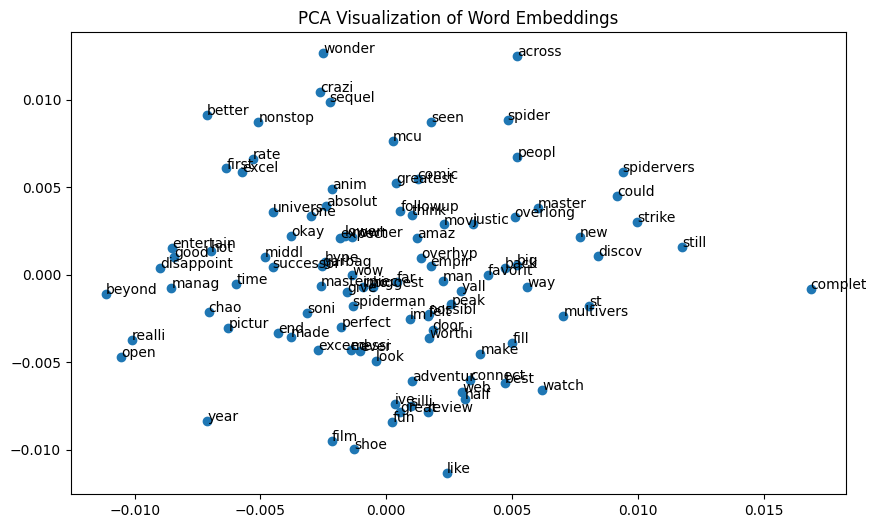

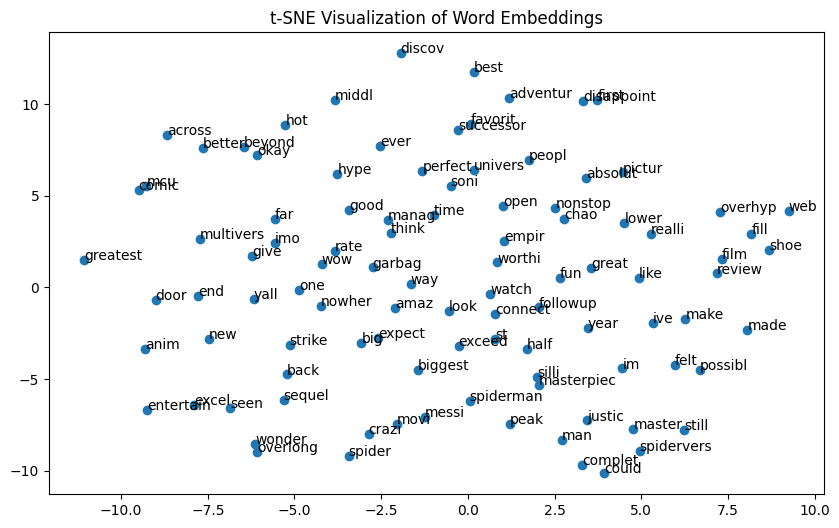

Cosine Similarity between word pairs:
movi - best: -0.0093
movi - one: 0.0385
movi - spiderman: 0.0861
movi - ever: 0.0174
movi - anim: 0.0283


In [ ]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec


file_path = "/content/imdb_reviews_cleaned.csv"

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

data = [line.strip().split(',')[-1] for line in lines[1:101] if line.strip()]

def tokenize(text):
    return text.lower().split()


tokenized_data = [tokenize(review) for review in data]


word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=300, window=5, min_count=1, workers=4)


word2vec_model.save("word2vec.model")
word2vec_model = Word2Vec.load("word2vec.model")


words = list(word2vec_model.wv.index_to_key)
word_vectors = np.array([word2vec_model.wv[word] for word in words])


pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors[:100])
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], marker='o')
for i, word in enumerate(words[:100]):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))
plt.title("PCA Visualization of Word Embeddings")
plt.show()


tsne = TSNE(n_components=2, perplexity=15, random_state=42)
tsne_result = tsne.fit_transform(word_vectors[:100])
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], marker='o')
for i, word in enumerate(words[:100]):
    plt.annotate(word, xy=(tsne_result[i, 0], tsne_result[i, 1]))
plt.title("t-SNE Visualization of Word Embeddings")
plt.show()


def cosine_similarity(word1, word2):
    if word1 in word2vec_model.wv and word2 in word2vec_model.wv:
        vec1 = word2vec_model.wv[word1]
        vec2 = word2vec_model.wv[word2]
        return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    else:
        return None


available_word_pairs = [(w1, w2) for w1 in words for w2 in words if w1 != w2][:5]

print("Cosine Similarity between word pairs:")
for w1, w2 in available_word_pairs:
    similarity = cosine_similarity(w1, w2)
    if similarity is not None:
        print(f"{w1} - {w2}: {similarity:.4f}")


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:


I will perform Sentiment Analysis, which involves determining the sentiment (positive, negative, or neutral) of each review. Additionally, Text Classification can be applied to categorize reviews based on predefined sentiment classes.

Labeling Schema Used
The dataset was labeled based on the rating column of IMDB reviews using the following rules:

Positive: If the rating is 7 or above (7-10), the review is labeled as positive.
Neutral: If the rating is 5 or 6, the review is labeled as neutral.
Negative: If the rating is 4 or below (1-4), the review is labeled as negative.
These labels help categorize the sentiments expressed in the reviews.

Annotated Dataset
The dataset consists of 100 rows with three columns:

document_id: A unique identifier for each review.
clean_text: The preprocessed version of the review.
sentiment: The assigned sentiment label (positive, negative, or neutral).


# The GitHub link of your final csv file
# Link: https://github.com/shivanikoyyada24/shivani_koyyada_assignment_3


# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
I have the 3rd question to be more challenging.